# Code for Drawing All the Plots

## Load CSV Data

In [91]:
import csv

csvData = []

with open('result/repo_info_selected_edited.csv') as csvFile:
    csvReader = csv.DictReader(csvFile)
    for row in csvReader:
        csvData.append(row)

## Average comment density of different language

In [92]:
import numpy as np
import matplotlib.pyplot as plt

def extract(lang, key):
    return np.array([float(row[key]) for row in csvData if row['language'] == lang])

langs = ['Python', 'Java', 'C++', 'JavaScript', 'Go']
comment_densities = [extract(lang, 'comment_ratio') for lang in langs]
avgs = [np.average(a) for a in comment_densities]
medians = [np.median(a) for a in comment_densities]
variances = [np.var(a) for a in comment_densities]

In [93]:
avgs

[0.3525416864333334,
 0.29399548046666674,
 0.1424895722,
 0.16026265626666666,
 0.14789911586666668]

In [94]:
medians

[0.2640942395, 0.255118774, 0.1386390515, 0.1546521005, 0.13934088]

In [95]:
variances

[0.08098209571192999,
 0.061977219962504014,
 0.0025379404059735103,
 0.011386012040948114,
 0.0033611595655458943]

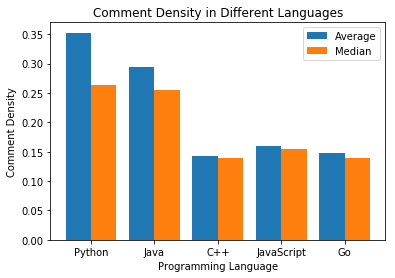

In [96]:
plt.bar([1,6,11,16,21], avgs, width=2, align='center', label='Average')
plt.bar([3,8,13,18,23], medians, width=2, align='center', label='Median')
plt.xticks([2,7,12,17,22], langs)
plt.xlabel('Programming Language')
plt.ylabel('Comment Density')
plt.legend()
plt.title('Comment Density in Different Languages')
plt.savefig('result/figures/cd_by_lang.pdf', bbox_inches='tight')
plt.show()

## Difference in Comment Density for Different Type of Projects

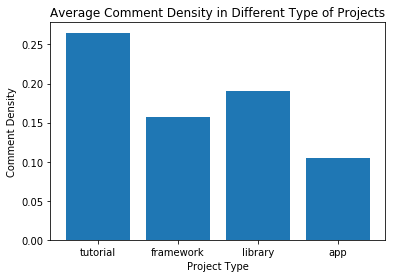

In [97]:
import numpy as np
import matplotlib.pyplot as plt

def extract(lang, type_):
    return [float(row['comment_ratio']) 
         for row in csvData 
         if row['language'] == lang and row['type'] == type_]

types = ['tutorial', 'framework', 'library', 'app']
cd_java = [np.array(extract('Java', t)) for t in types];
cd_js = [np.array(extract('JavaScript', t)) for t in types];
avgs_java = [np.average(a) for a in cd_java]
avgs_js = [np.average(a) for a in cd_js]



plt.bar(types, avgs_js)
plt.title('Average Comment Density in Different Type of Projects')
plt.xlabel('Project Type')
plt.ylabel('Comment Density')
plt.savefig('result/figures/avg_cd_java_js.pdf')
plt.show()